In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import nltk
import spacy
import string

In [5]:
#Load the train data
train = pd.read_csv(r"D:\finance_default\Train.csv")
train.IsUnderRisk.value_counts([0])

1    0.626151
0    0.373849
Name: IsUnderRisk, dtype: float64

In [6]:
Y = train.IsUnderRisk
X = train.drop(["IsUnderRisk"],axis = 1)

In [7]:
X.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,2,8.032,14,8,3,6,0
1,31,77.730,8,3,3,8,1
2,40,59.203,3,12,11,3,0
3,12,73.080,4,5,7,6,0
4,4,15.666,13,15,6,7,2


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 29.8 KB


In [9]:
X.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000


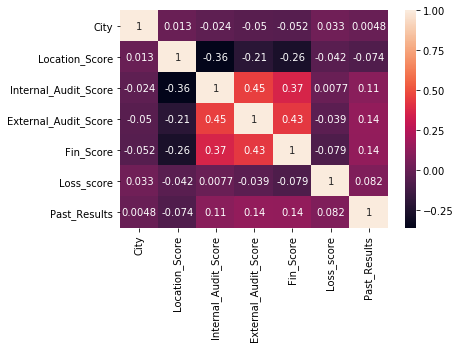

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
corr = X.corr()
sn.heatmap(corr, annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211BB1ED160>,
      dtype=object)

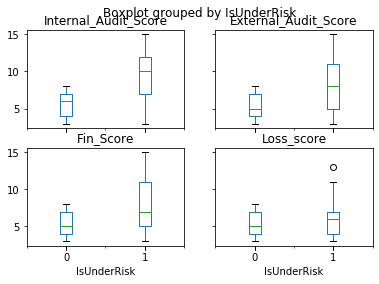

In [11]:
train.boxplot(by ='IsUnderRisk', column =['Internal_Audit_Score','External_Audit_Score',
                                          'Fin_Score','Loss_score'], grid = False) 

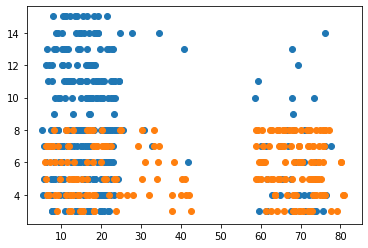

In [12]:
b = train.loc[train['IsUnderRisk']==1,]
c = train.loc[train['IsUnderRisk']==0,]
plt.scatter(b['Location_Score'],b['Fin_Score'])
plt.scatter(c['Location_Score'],c['Fin_Score'])

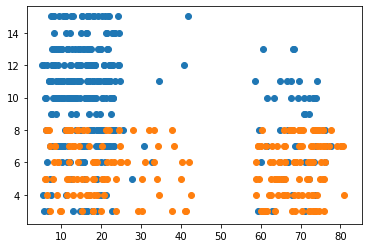

In [13]:
plt.scatter(b['Location_Score'],b['Internal_Audit_Score'])
plt.scatter(c['Location_Score'],c['Internal_Audit_Score'])

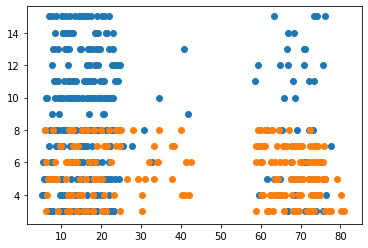

In [14]:
plt.scatter(b['Location_Score'],b['External_Audit_Score'])
plt.scatter(c['Location_Score'],c['External_Audit_Score'])

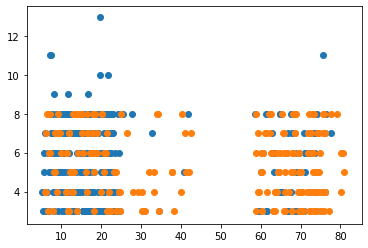

In [15]:
plt.scatter(b['Location_Score'],b['Loss_score'])
plt.scatter(c['Location_Score'],c['Loss_score'])

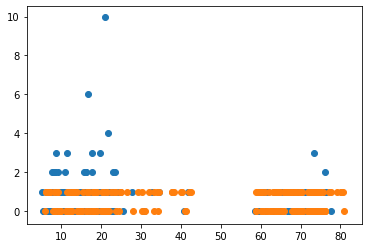

In [16]:
plt.scatter(b['Location_Score'],b['Past_Results'])
plt.scatter(c['Location_Score'],c['Past_Results'])

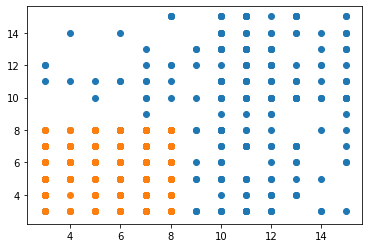

In [17]:
plt.scatter(b['Internal_Audit_Score'],b['External_Audit_Score'])
plt.scatter(c['Internal_Audit_Score'],c['External_Audit_Score'])

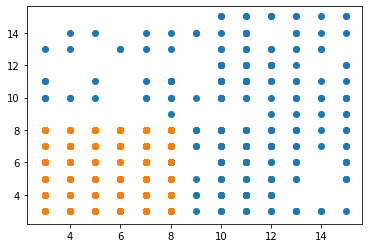

In [18]:
plt.scatter(b['Internal_Audit_Score'],b['Fin_Score'])
plt.scatter(c['Internal_Audit_Score'],c['Fin_Score'])

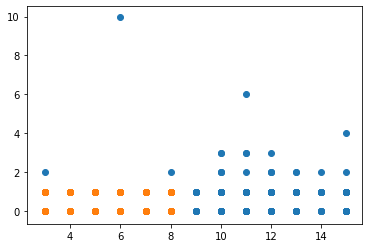

In [19]:
plt.scatter(b['Internal_Audit_Score'],b['Past_Results'])
plt.scatter(c['Internal_Audit_Score'],c['Past_Results'])

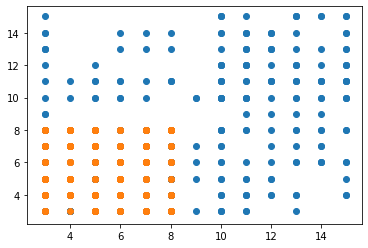

In [20]:
plt.scatter(b['External_Audit_Score'],b['Fin_Score'])
plt.scatter(c['External_Audit_Score'],c['Fin_Score'])

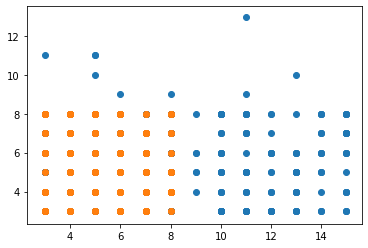

In [21]:
plt.scatter(b['External_Audit_Score'],b['Loss_score'])
plt.scatter(c['External_Audit_Score'],c['Loss_score'])

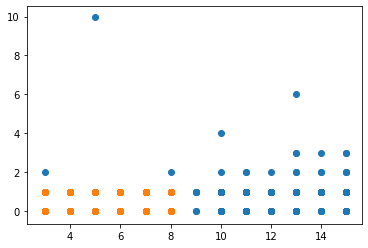

In [22]:
plt.scatter(b['External_Audit_Score'],b['Past_Results'])
plt.scatter(c['External_Audit_Score'],c['Past_Results'])

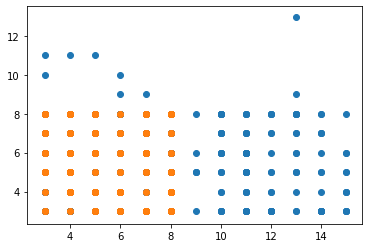

In [23]:
plt.scatter(b['Fin_Score'],b['Loss_score'])
plt.scatter(c['Fin_Score'],c['Loss_score'])

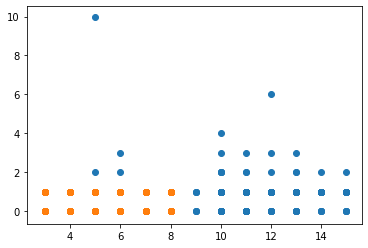

In [24]:
plt.scatter(b['Fin_Score'],b['Past_Results'])
plt.scatter(c['Fin_Score'],c['Past_Results'])

In [25]:
#With these figures some of the patterns are identified and subsetting the data:
train_not_confirmed_result = train.loc[(train['Internal_Audit_Score']<9) & (train['External_Audit_Score']<9) &
                                   (train['Fin_Score']<9) & (train['Loss_score']<9) & (train['Past_Results']<2),]

In [26]:
train_not_confirmed_result.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,20.890071,41.635028,5.875887,5.514184,5.546099,5.429078,0.517730,0.280142
std,15.235236,26.445357,1.692201,1.712881,1.699802,1.701038,0.500574,0.449867
min,0.000000,5.363000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,15.804750,5.000000,4.000000,4.000000,4.000000,0.000000,0.000000
50%,17.500000,34.117000,6.000000,5.000000,5.000000,5.000000,1.000000,0.000000
75%,38.000000,68.629500,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000


In [27]:
#Remaining data is known to be sure Risk case:
train_confirmed_result = train.loc[~train.index.isin(train_not_confirmed_result.index),]

In [28]:
train_confirmed_result.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,18.157088,22.129299,10.689655,9.287356,8.666667,5.639847,0.716475,1.0
std,14.039307,18.356635,2.773405,3.772088,3.546396,1.974984,0.962807,0.0
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,1.0
25%,6.000000,11.759000,10.000000,6.000000,6.000000,4.000000,0.000000,1.0
50%,13.000000,16.789000,11.000000,10.000000,8.000000,6.000000,1.000000,1.0
75%,31.000000,21.531000,12.000000,12.000000,11.000000,7.000000,1.000000,1.0
max,41.000000,76.010000,15.000000,15.000000,15.000000,13.000000,10.000000,1.0


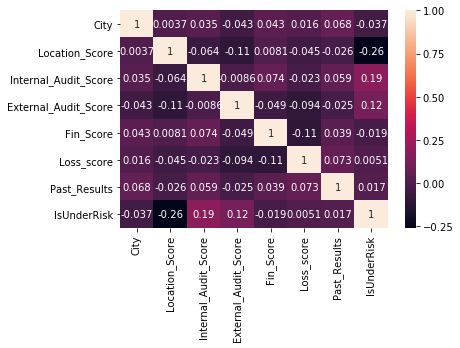

In [29]:
import matplotlib.pyplot as plt
corr = train_not_confirmed_result.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [30]:
train_not_confirmed_result['IsUnderRisk'].value_counts()

0    203
1     79
Name: IsUnderRisk, dtype: int64

In [31]:
train_not_confirmed_result['IsUnderRisk'].value_counts([0]) #On seeing this the dataset is imbalanced

0    0.719858
1    0.280142
Name: IsUnderRisk, dtype: float64

In [32]:
X = train_not_confirmed_result.drop(['IsUnderRisk'],axis=1)
Y = train_not_confirmed_result['IsUnderRisk']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))

#Additionally, Grid search and CV is done on dataset, SVC and XGB models are generated

In [36]:
test = pd.read_csv(r"D:\finance_default\Test.csv")
test["index"] = test.index

In [37]:
#Rule which is identified from the data visualised pattern is implemented
test_not_confirmed_result = test.loc[(test['Internal_Audit_Score']<9) & (test['External_Audit_Score']<9) &
                                   (test['Fin_Score']<9) & (test['Loss_score']<9) & (test['Past_Results']<2),]

In [38]:
test_confirmed_result = test.loc[~test.index.isin(test_not_confirmed_result.index),]

In [39]:
test_pred_not_confirmed = classifier.predict_proba(test_not_confirmed_result.drop(["index"],axis=1))

In [40]:
test_pred_not_confirmed[0:2]

array([[0.855, 0.145],
       [0.351, 0.649]])

In [41]:
test_pred_not_confirmed = pd.DataFrame(test_pred_not_confirmed,columns=["0","1"])

In [42]:
df1 = test_not_confirmed_result
df2 = test_pred_not_confirmed
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df = pd.concat( [df1, df2], axis=1) 

In [43]:
#Rule which is identified from the data is implemented
test_confirmed_result["0"] = 0
test_confirmed_result["1"] = 1

C:\Users\ashik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
test_final_results = df.append(test_confirmed_result)

In [45]:
test_final_results = test_final_results.sort_values(by=['index'])

In [46]:
test_final_results.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,index,0,1
0,41,18.272,13,12,9,7,0,0,0.000,1.000
1,17,64.799,6,10,7,4,1,1,0.000,1.000
0,31,68.890,3,3,7,8,0,2,0.855,0.145
3,3,16.492,15,10,7,4,1,3,0.000,1.000
1,9,17.178,7,3,8,3,1,4,0.351,0.649


In [47]:
final_submission = test_final_results[["0","1"]]

In [48]:
final_submission.head()

,0,1
0,0.000,1.000
1,0.000,1.000
0,0.855,0.145
3,0.000,1.000
1,0.351,0.649


In [ ]:
final_submission.to_excel("submission_21.xlsx",index = False)